# Portfolio Analysis of healthcare sector

### Stocks under observation:

    - Biogen Inc. (NYSE:BIIB) 
    - Boston Scientific Corp. (NYSE:BSX)
    - Regeneron Pharmaceuticals Inc. (NYSE:REGN)
    - Gilead Sciences Inc. (NYSE:GILD)
    - ResMed Inc. (NYSE:RMD)
    - Vertex Pharmaceuticals Inc. (NYSE: VRTX)


In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import scipy.optimize as sco
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Pulling stock data 

In [4]:
healthcare = ['BIIB', 'BSX', 'REGN', 'GILD','RMD', 'VRTX' ]
data = pd.DataFrame()
for i in range(len(healthcare)):
    
    df = wb.DataReader(healthcare[i], data_source='yahoo', start='2020-1-1')
    df['stock'] = healthcare[i]
    data = data.append(df[['Adj Close', 'stock']])

table = data.pivot(columns='stock')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,BIIB,BSX,GILD,REGN,RMD,VRTX
Date,,,,,,
2020-01-02,294.239990,45.330002,64.628151,373.350006,155.397385,219.449997
2020-01-03,290.850006,44.980000,64.469620,369.160004,154.581116,217.979996
2020-01-06,290.820007,45.349998,65.044273,371.739990,155.317734,224.029999
2020-01-07,290.089996,45.400002,64.519165,373.130005,154.441742,223.789993
2020-01-08,292.660004,45.639999,65.192894,382.420013,155.556641,231.089996


Text(0, 0.5, 'price in $')

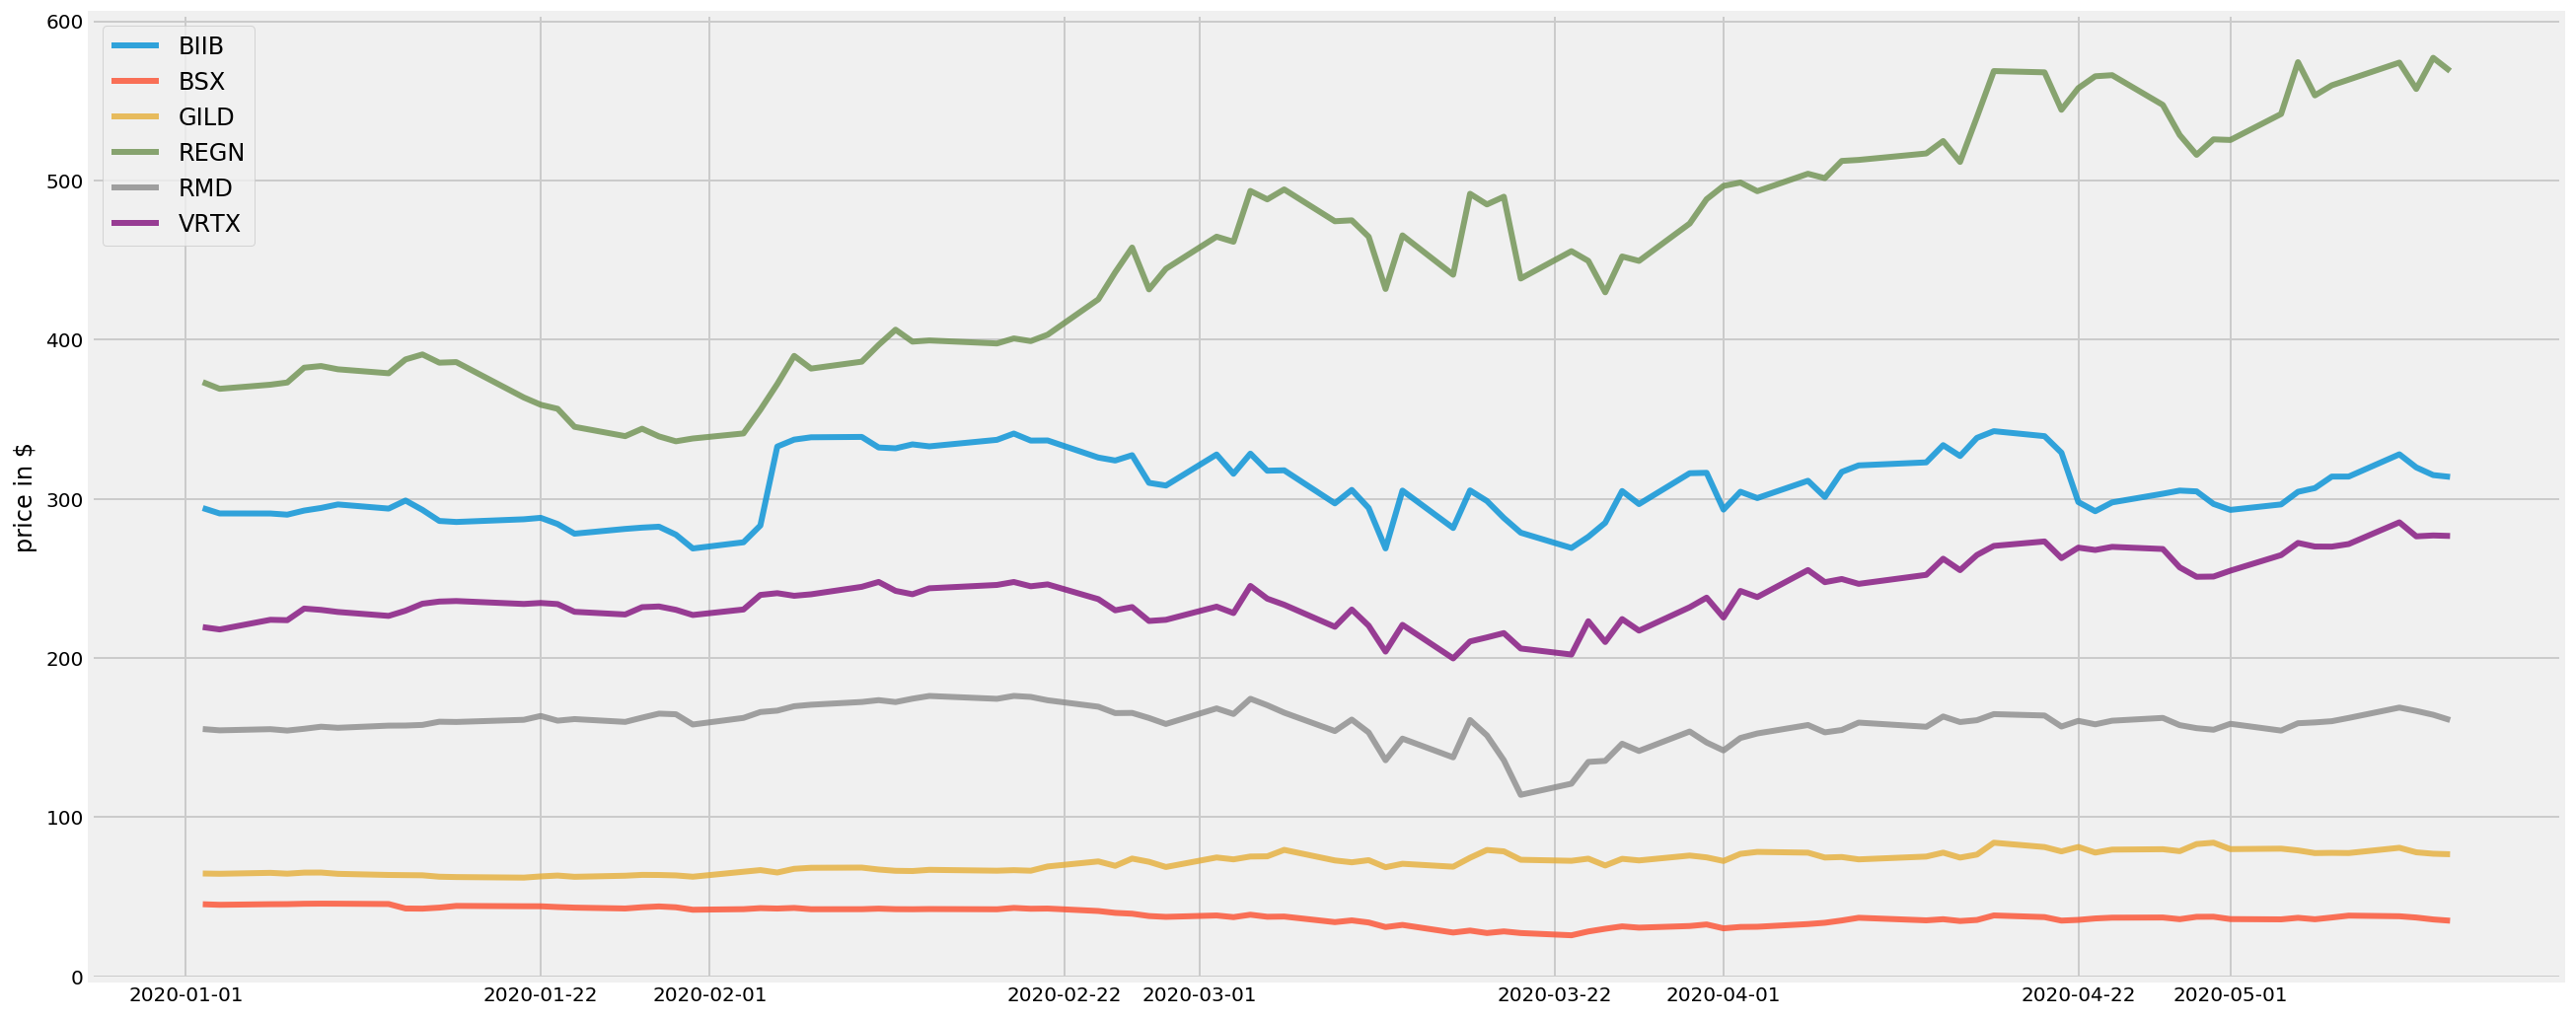

In [5]:
plt.figure(figsize=(20, 9))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

### Simple returns

Text(0, 0.5, 'daily returns')

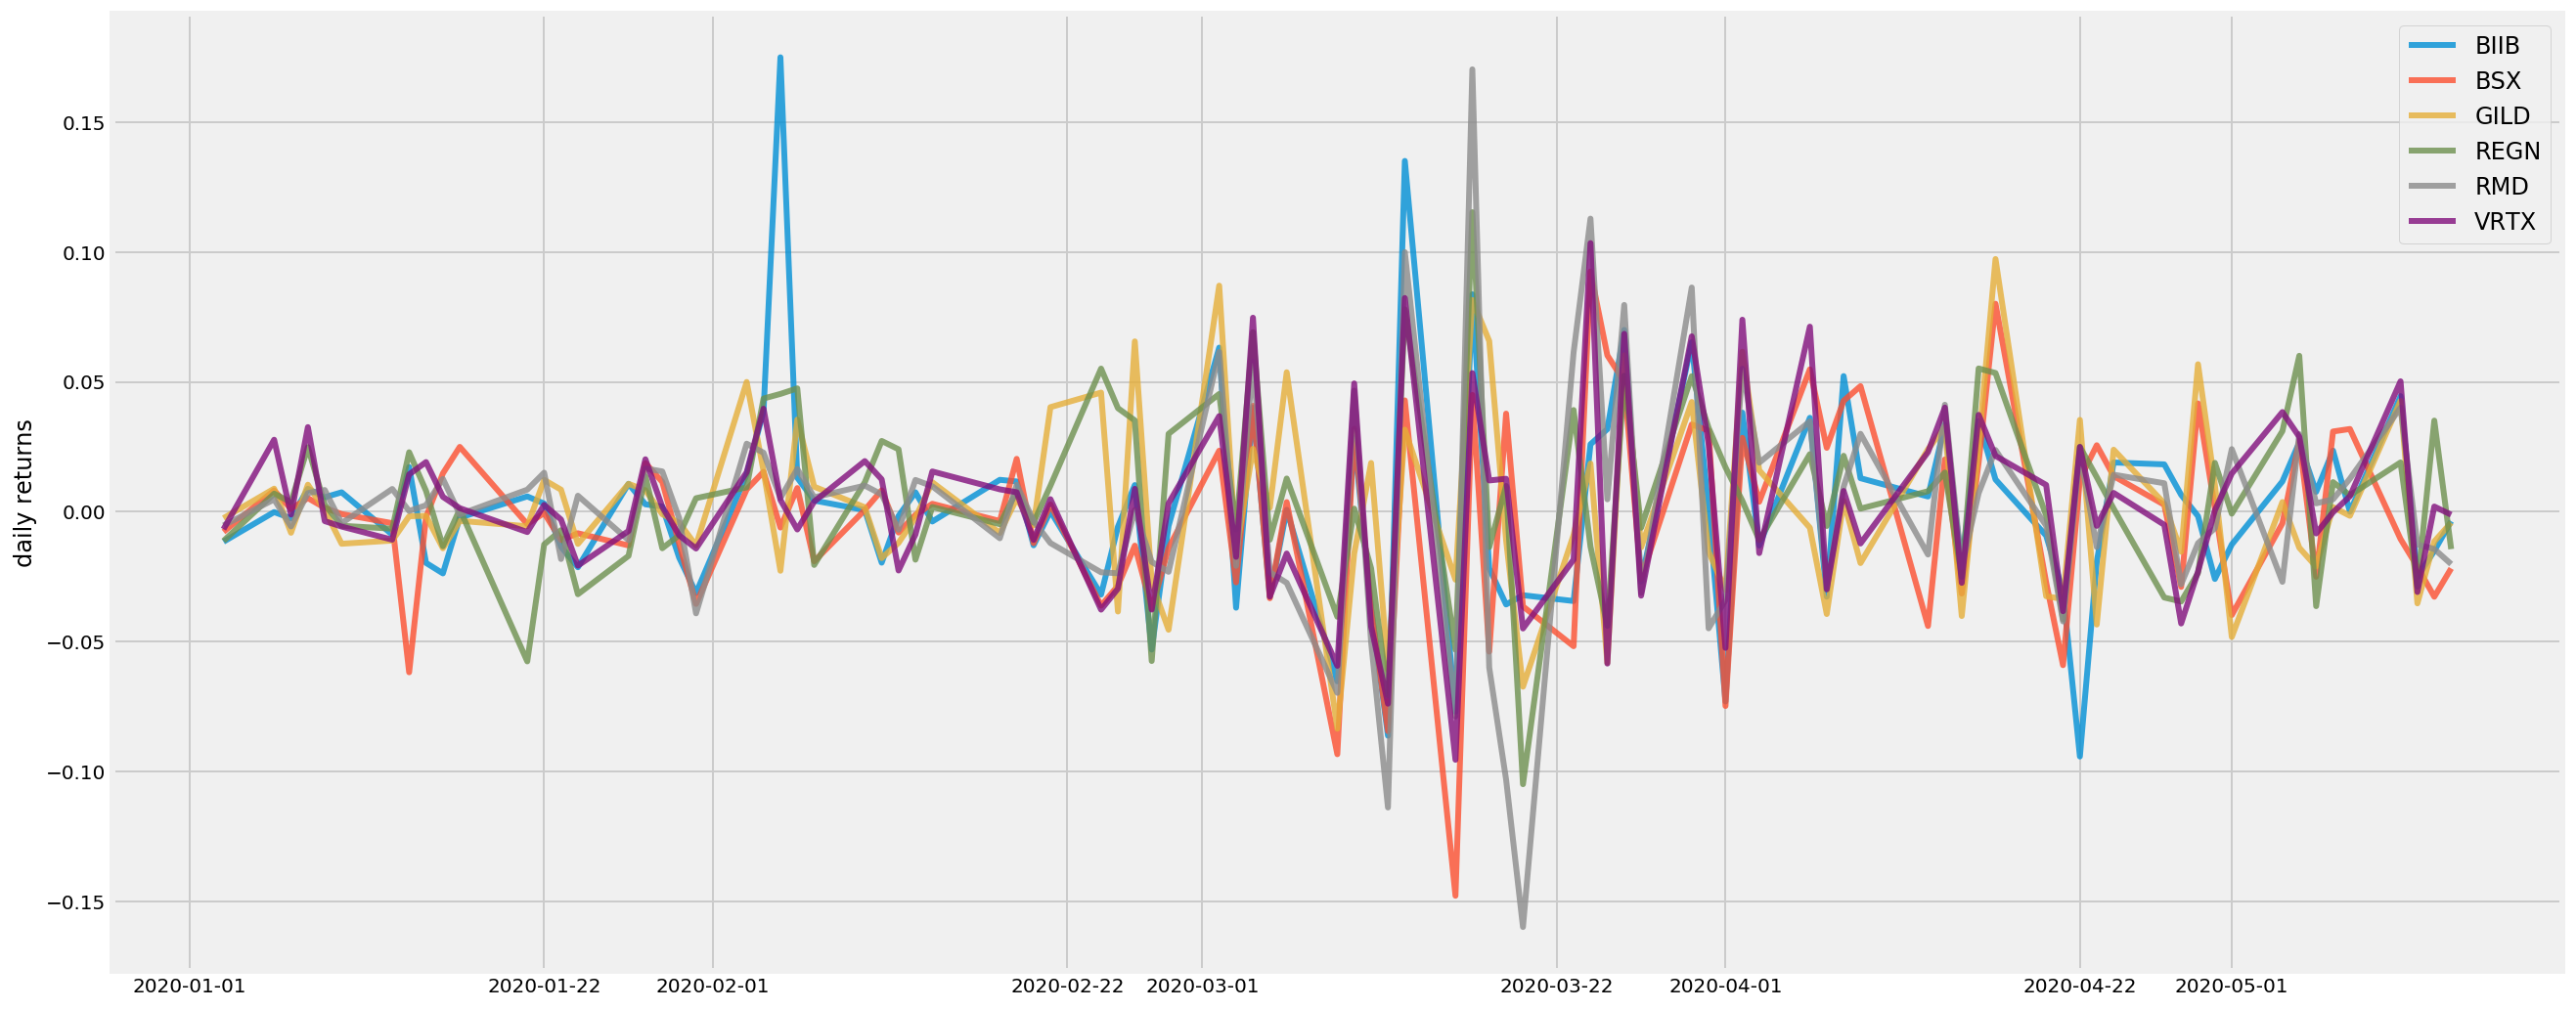

In [6]:
returns = table.pct_change()
plt.figure(figsize=(20, 9))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

### log returns

Text(0, 0.5, 'daily log returns')

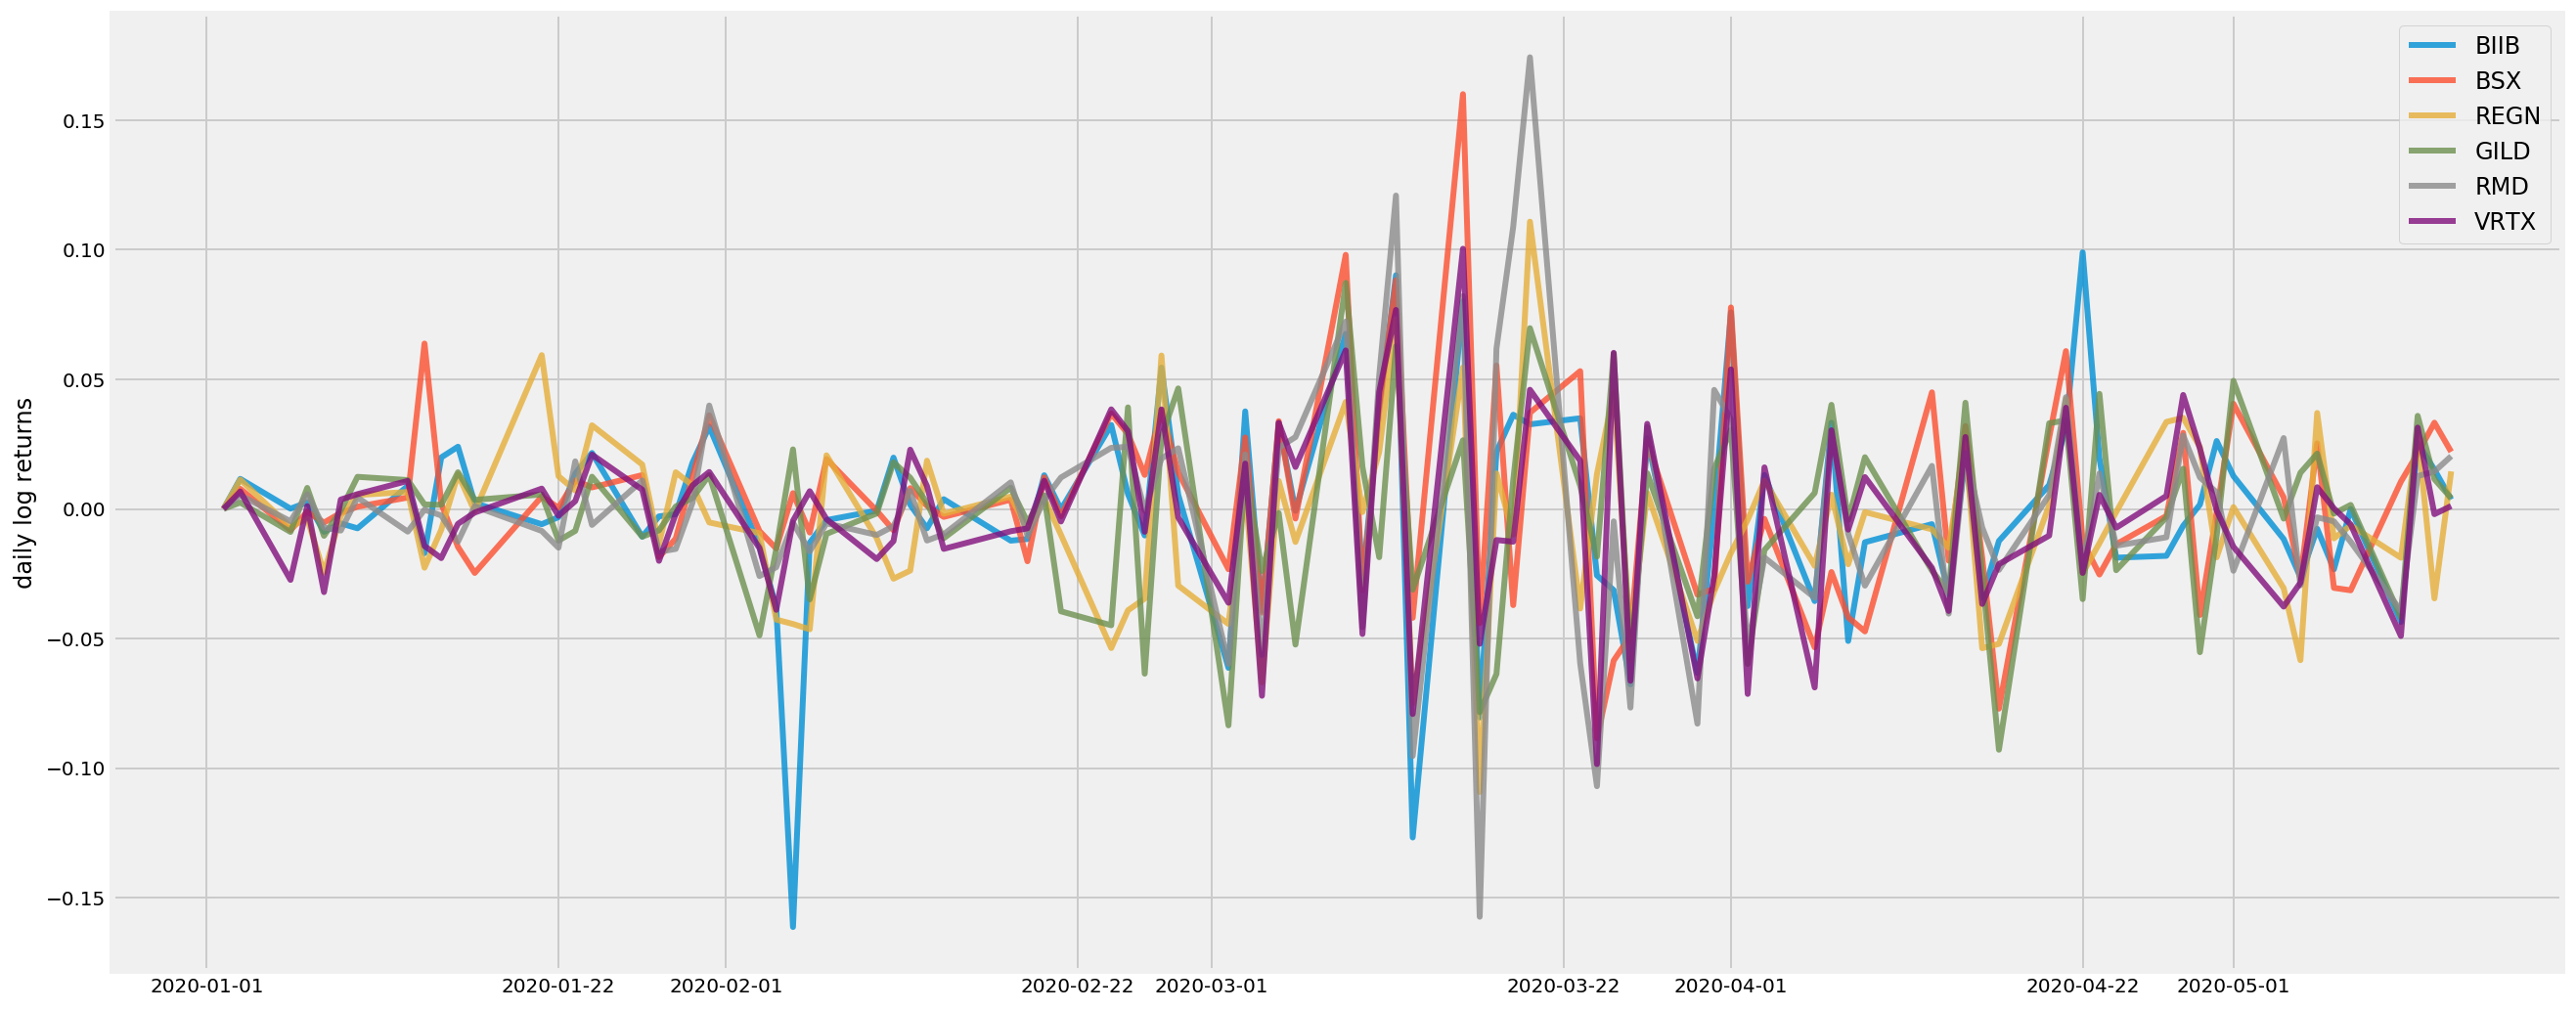

In [7]:
log = pd.DataFrame(columns = healthcare, index = table.index)

for i in range(len(healthcare)):
    log_list = []
    for j in range(len(table[healthcare[i]])):
        if(j+1<len(table[healthcare[i]])):
            log_returns =  np.log(table[healthcare[i]][j]) - np.log(table[healthcare[i]][j+1])
            log_list.append(log_returns)
            

        else:
            None
    log_list.insert(0, 0)   
    log[healthcare[i]] = log_list


plt.figure(figsize=(20, 9))
for c in log.columns.values:
     plt.plot(log.index, log[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily log returns')


### Normalization to 100

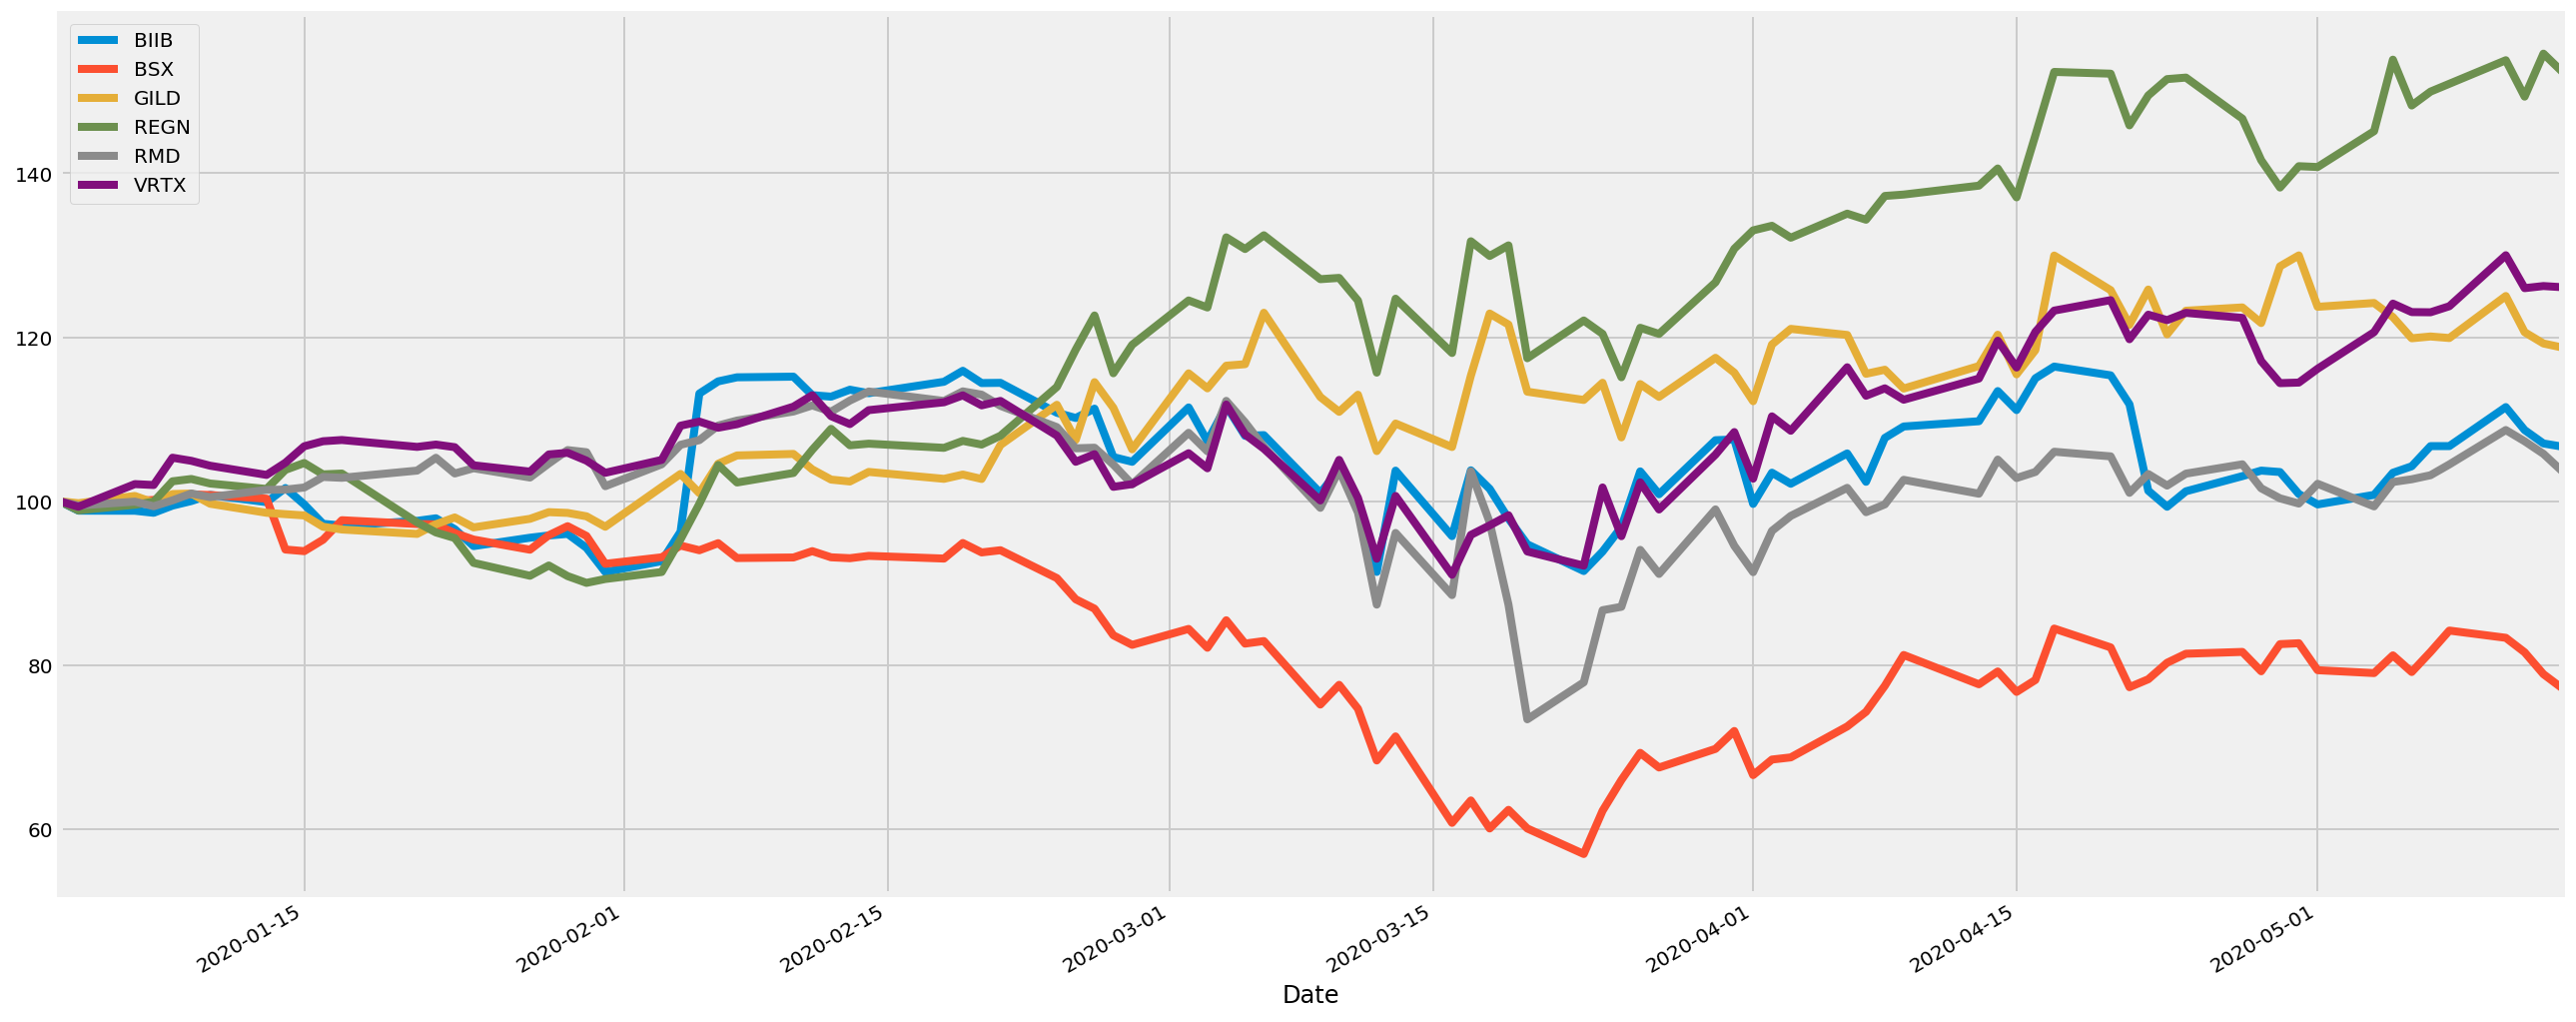

In [8]:
(table/table.iloc[0] * 100).plot(figsize = (20,9))
plt.show()

In [9]:
returns

,BIIB,BSX,GILD,REGN,RMD,VRTX
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.011521,-0.007721,-0.002453,-0.011223,-0.005253,-0.006699
2020-01-06,-0.000103,0.008226,0.008914,0.006989,0.004765,0.027755
2020-01-07,-0.002510,0.001103,-0.008073,0.003739,-0.005640,-0.001071
2020-01-08,0.008859,0.005286,0.010442,0.024898,0.007219,0.032620
...,...,...,...,...,...,...
2020-05-08,0.000032,0.031892,-0.001546,0.006377,0.012757,0.006000
2020-05-11,0.044551,-0.010477,0.042715,0.019010,0.040123,0.050252
2020-05-12,-0.025121,-0.021175,-0.035272,-0.028862,-0.012583,-0.030882


In [10]:
log.mean()*252

BIIB   -0.174568
BSX     0.701554
REGN   -1.140951
GILD   -0.465449
RMD    -0.096983
VRTX   -0.628325
dtype: float64

In [11]:
log.std()*252**0.5

BIIB    0.609940
BSX     0.595646
REGN    0.532000
GILD    0.530374
RMD     0.696812
VRTX    0.543643
dtype: float64